In [1]:
import numpy as np
from cosmoTransitions.tunneling1D import SingleFieldInstanton
from cosmoTransitions import generic_potential
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.integrate as integrate
import random
from scipy import interpolate, special
import seaborn as sns
from scipy import misc
from scipy.special import hyp2f1



%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size

label_size=20
thick_size=20


####Some definitions##
v2 = 246.2**2
mh=125.09
v=246.2
alpha=1/137
sinthw=np.sqrt(0.223)
g1=np.sqrt(4*np.pi*alpha/(1-sinthw**2))
g=np.sqrt(4*np.pi*alpha)/sinthw
Mplanck=2.4*10**18
cs=1/3**0.5 ##Sound speed constant




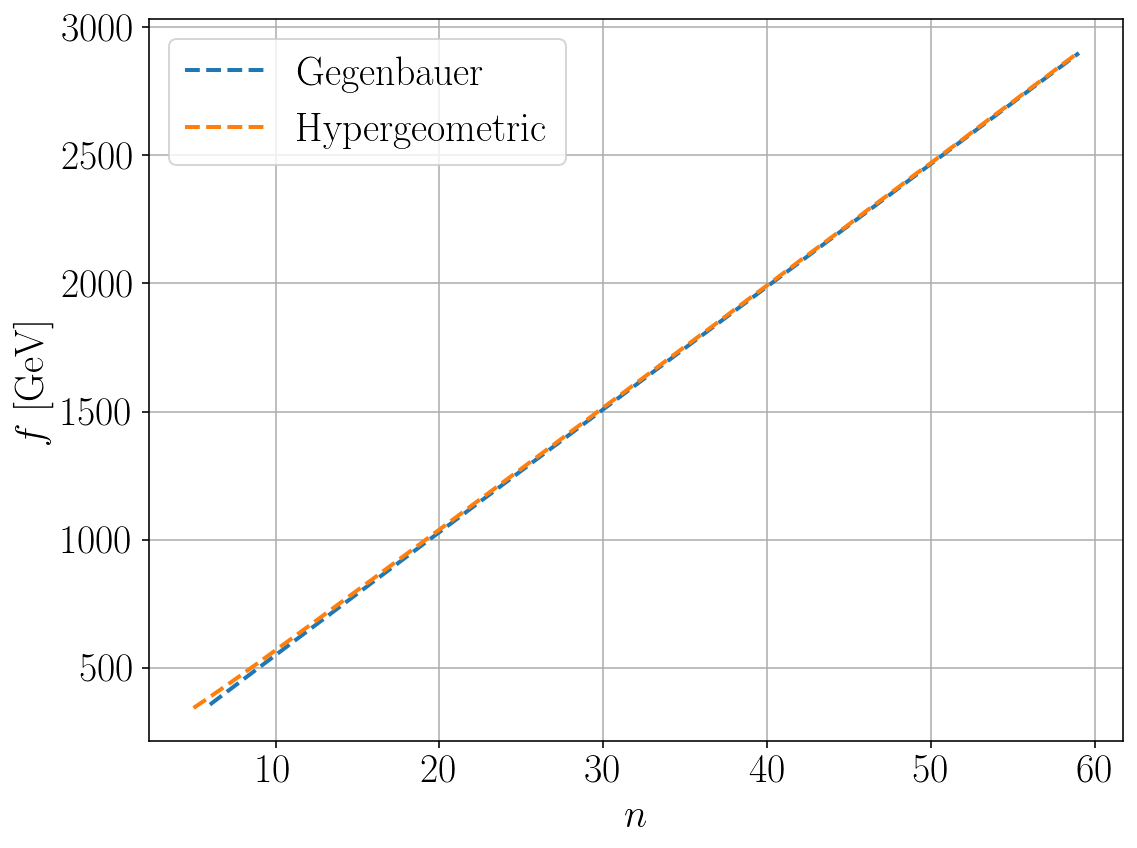

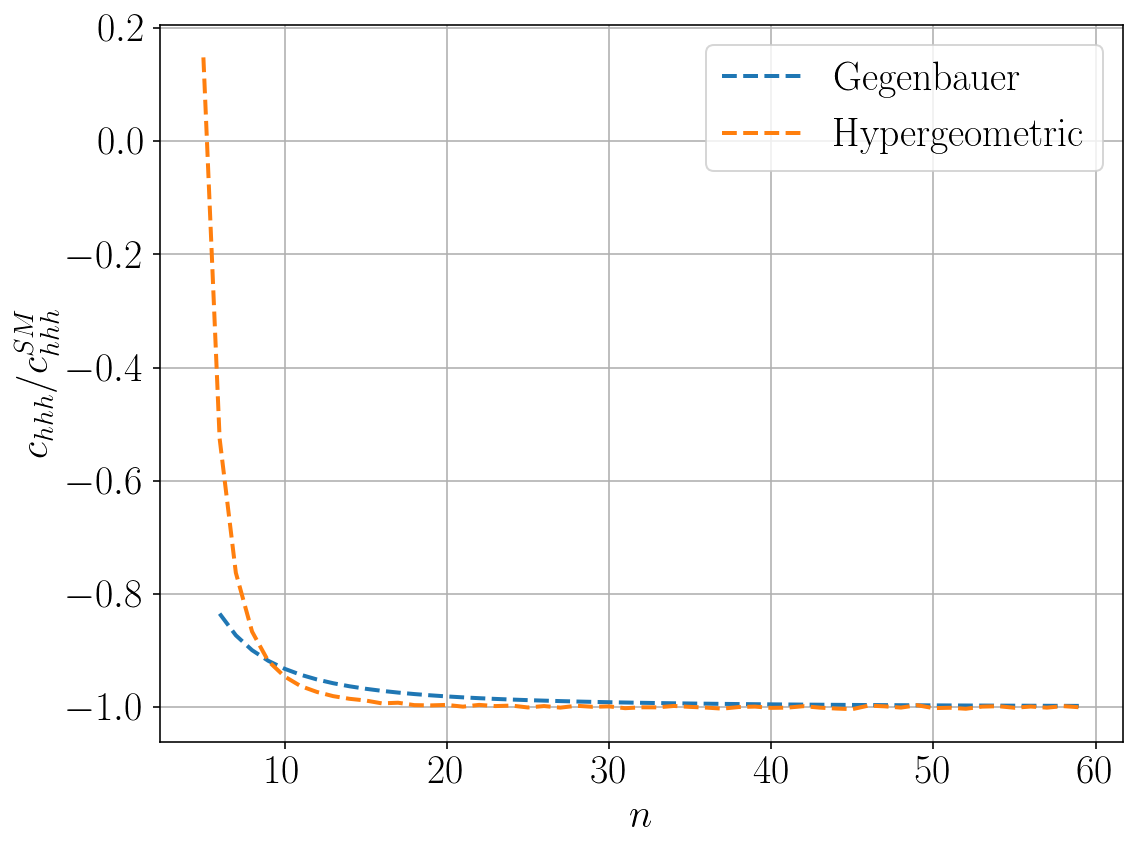

In [7]:
df_hyper=pd.read_csv("./chhh_Hypergeometric_python.csv",index_col=[0])
df_gegen=pd.read_csv("./chhh_Gegenbauer_python.csv",index_col=[0])


plt.plot(df_gegen.n,df_gegen.f,'--', linewidth=2, markersize=12,label="Gegenbauer",)
plt.plot(df_hyper.n,df_hyper.f,'--', linewidth=2,label="Hypergeometric")
plt.legend(loc="best",prop={'size': label_size})
#plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
#plt.clim(1e-3,1)
plt.grid(True)
plt.ylabel("$f$ [GeV]",size=label_size)
plt.xlabel("$n$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
#plt.title("Symmetry breaking scale",size=label_size)
plt.tight_layout()
plt.savefig('./PLOTS/fvsn.pdf', dpi=300)
plt.show()


plt.plot(df_gegen.n,df_gegen.chhh,'--', linewidth=2, markersize=12,label="Gegenbauer",)
plt.plot(df_hyper.n,df_hyper.chhh,'--', linewidth=2,label="Hypergeometric")
plt.legend(loc="best",prop={'size': label_size})
#plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
#plt.clim(1e-3,1)
plt.grid(True)
plt.ylabel("$c_{hhh}/c^{SM}_{hhh}$ ",size=label_size)
plt.xlabel("$n$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
#plt.title("Symmetry breaking scale",size=label_size)
plt.tight_layout()
plt.savefig('./PLOTS/HiggsCoupling.pdf', dpi=300)
plt.show()

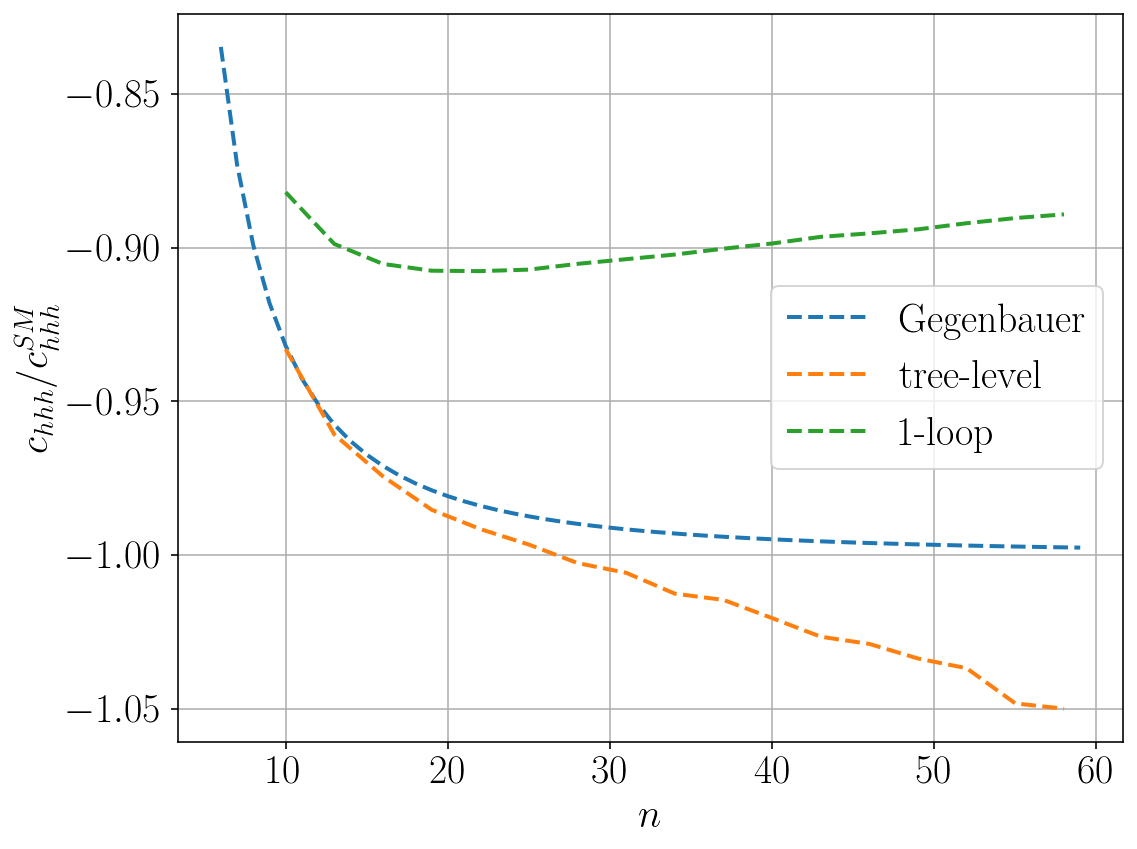

In [23]:
df_out=pd.read_csv("./Gegenbauer_thermodynamics_2.csv",index_col=[0])

plt.plot(df_gegen.n,df_gegen.chhh,'--', linewidth=2, markersize=12,label="Gegenbauer",)
plt.plot(df_out.n,df_out.chhh_tree,'--', linewidth=2, markersize=12,label="tree-level")
plt.plot(df_out.n,df_out.chhh_loop,'--', linewidth=2, markersize=12,label="1-loop")


plt.legend(loc="best",prop={'size': label_size})
#plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
#plt.clim(1e-3,1)
plt.grid(True)
plt.ylabel("$c_{hhh}/c^{SM}_{hhh}$ ",size=label_size)
plt.xlabel("$n$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
#plt.title("Symmetry breaking scale",size=label_size)
plt.tight_layout()
#plt.savefig('./PLOTS/HiggsCoupling.pdf', dpi=300)
plt.show()

In [27]:
df_out=pd.read_csv("./Gegenbauer_thermodynamics_2.csv",index_col=[0])
df_out

,Ngb,n,Trestored,Tc,phi_false,phi_true,Tn,alpha,beta,vw,SNR,chhh_loop,epsilon,chhh_tree,epsilon_tree
0,4,10,257.788945,250.679561,47.261876,189.220802,249.435062,0.000953,555382.058504,0.142204,4.441338e-21,-0.881956,4.213902e-05,-0.933011,4.357515e-05
1,4,13,257.788945,249.911887,37.111854,190.226115,248.503266,0.001026,245889.743917,0.151834,3.722282e-19,-0.898792,1.051598e-05,-0.960807,1.094866e-05
2,4,16,257.286432,249.315858,22.357482,191.341848,247.748701,0.001096,167684.283663,0.158651,3.361973e-18,-0.905282,3.402372e-06,-0.974426,3.558442e-06
3,4,19,257.286432,248.783994,2.324184,192.426376,247.015012,0.001142,105966.205583,0.166709,4.165683e-17,-0.907496,1.315181e-06,-0.985286,1.383205e-06
4,4,22,257.286432,248.352870,-0.018646,193.505740,246.338673,0.001159,68890.525250,0.177765,4.245229e-16,-0.907622,5.786369e-07,-0.991577,6.110145e-07
5,4,25,257.286432,247.987778,-0.009750,194.342867,245.826239,0.001170,57727.640764,0.184142,1.136492e-15,-0.907135,2.809597e-07,-0.996624,2.977914e-07
6,4,28,257.286432,247.672457,-0.043243,195.140368,245.343650,0.001181,46886.895148,0.191080,3.554112e-15,-0.905261,1.473435e-07,-1.002628,1.569597e-07
7,4,31,257.286432,247.333166,-0.009765,195.771857,244.872898,0.001190,41417.560123,0.196382,7.158485e-15,-0.903734,8.226950e-08,-1.005810,8.791389e-08
8,4,34,257.286432,247.104474,-0.004884,196.371676,244.547564,0.001197,38589.421413,0.200210,1.080019e-14,-0.902227,4.836043e-08,-1.012595,5.196185e-08
9,4,37,257.286432,246.827058,-0.009277,196.779744,244.235503,0.001201,39298.784940,0.201648,1.018799e-14,-0.900325,2.967358e-08,-1.014628,3.196763e-08


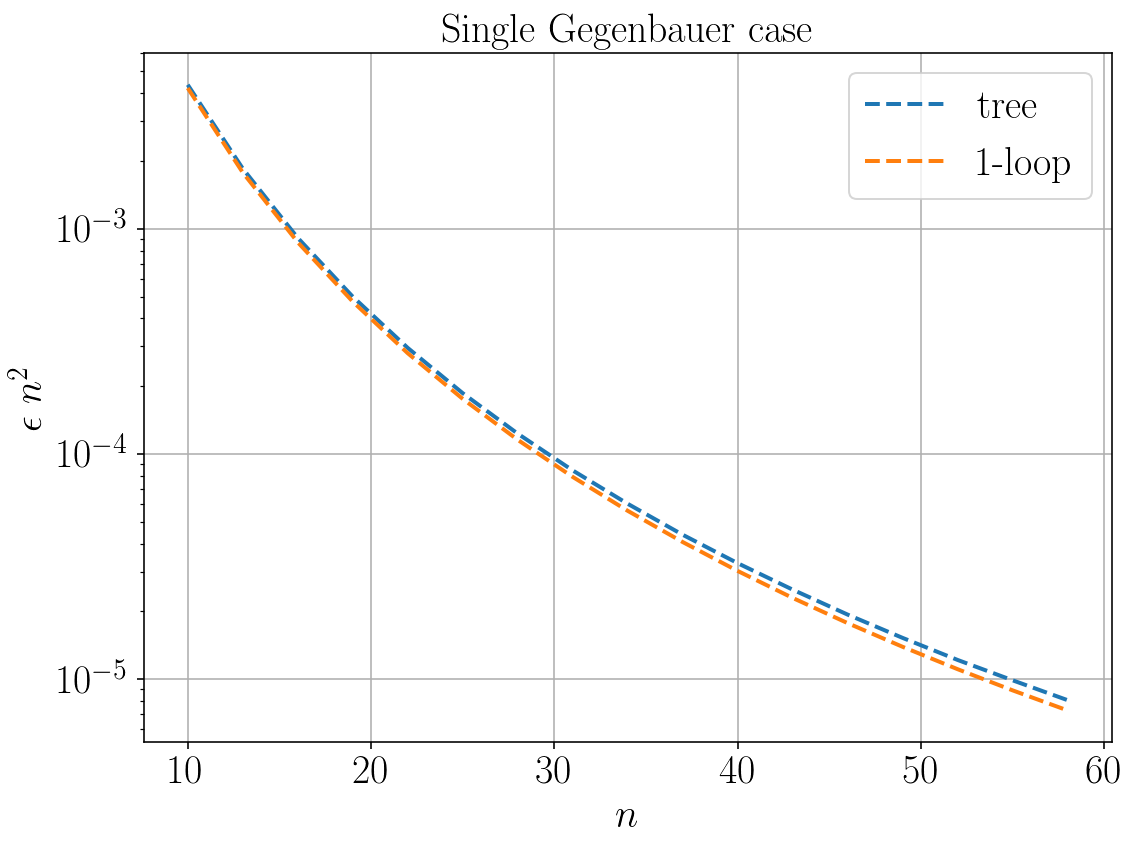

In [30]:
df_out=pd.read_csv("./Gegenbauer_thermodynamics_2.csv",index_col=[0])
plt.plot(df_out.n,df_out.epsilon_tree*df_out.n**2,'--', linewidth=2, markersize=12,label="tree")
plt.plot(df_out.n,df_out.epsilon*df_out.n**2,'--', linewidth=2, markersize=12,label="1-loop")

plt.legend(loc="best",prop={'size': label_size})
#plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\eta/\eta_{obs}$", size=label_size, weight='bold')
#plt.clim(1e-3,1)
plt.yscale("log")
plt.grid(True)
plt.ylabel("$\\epsilon \ n^2$ ",size=label_size)
plt.xlabel("$n$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.title("Single Gegenbauer case",size=label_size)
plt.tight_layout()
plt.savefig('./PLOTS/Loop_consistency.pdf', dpi=300)
plt.show()